In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
file_path = 'car_prices.csv'
df = pd.read_csv(file_path)

## data preprocess

### 重新命名 column

In [3]:
df.rename(columns={'make': 'brand', 'body': 'body_type', 'odometer': 'mileage'}, inplace=True)

### 刪掉空白數據

In [4]:
df.dropna(inplace=True)

### 刪掉沒意義的vinn column

In [31]:
df.drop(columns=['vin'], inplace=True)

C:\Users\jenna\AppData\Local\Temp\ipykernel_26444\1449701224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['vin'], inplace=True)


### Add a column 車輛賣出時年紀

In [5]:
df['sale_year'] = df['saledate'].str[11:15]
df['sale_year'] = pd.to_numeric(df['sale_year'], errors='coerce').astype('Int64')

In [6]:
df.shape

(472325, 17)

### 先把極端值以及不合理的數據都排除掉

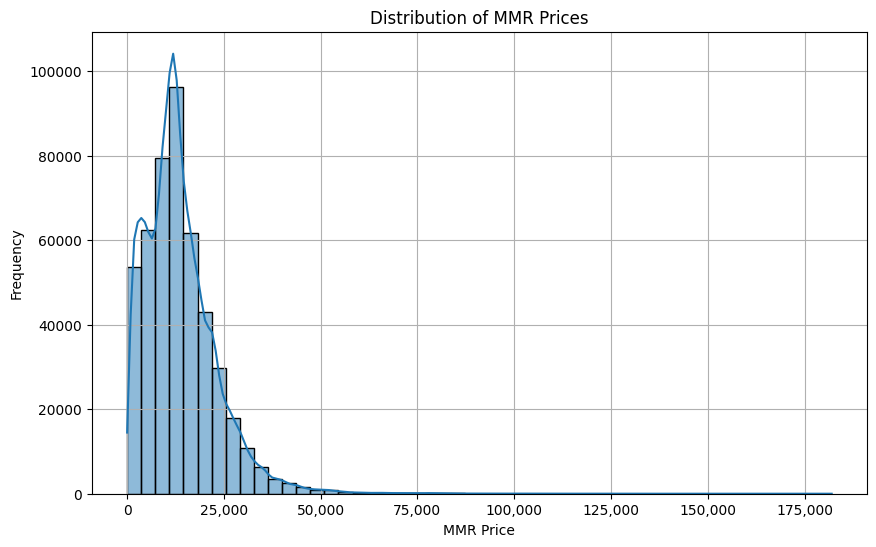

In [7]:
mmr_column = 'mmr'

plt.figure(figsize=(10, 6))
sns.histplot(df[mmr_column].dropna(), bins=50, kde=True)
plt.xlabel("MMR Price")
plt.ylabel("Frequency")
plt.title("Distribution of MMR Prices")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [8]:
mmr_column = 'mmr'

low_threshold = df[mmr_column].quantile(0.02)
high_threshold = df[mmr_column].quantile(0.98)

print(f"MMR lowwer {low_threshold:,.0f}")
print(f"MMR higher {high_threshold:,.0f}")

MMR lowwer 1,125
MMR higher 38,100


In [9]:
df = df[(df['mmr'] > 500) & (df['mmr'] < 45000)] 

df.shape

(466319, 17)

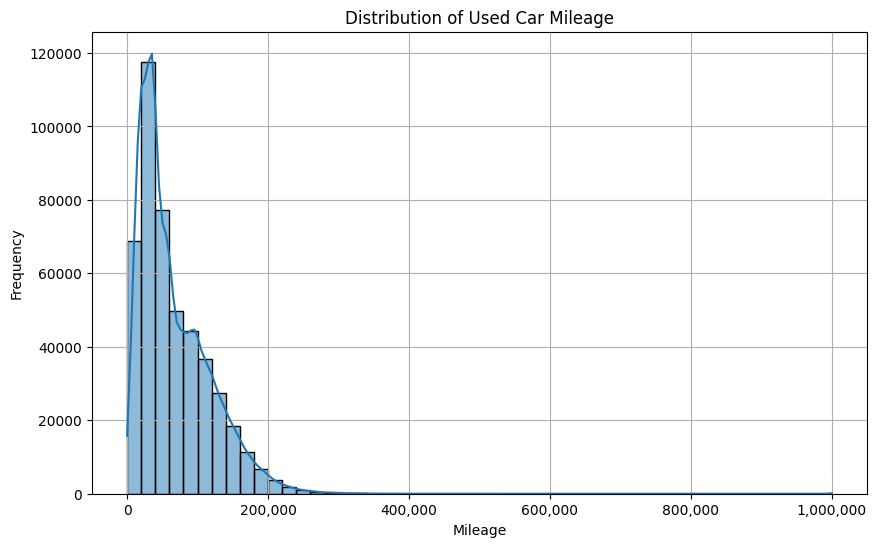

In [10]:
mileage_column = 'mileage'

plt.figure(figsize=(10, 6))
sns.histplot(df[mileage_column].dropna(), bins=50, kde=True)
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Distribution of Used Car Mileage")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [11]:
mileage_column = 'mileage'

low_threshold = df[mileage_column].quantile(0.02)
high_threshold = df[mileage_column].quantile(0.98)

print(f"mileage lowwer {low_threshold:,.0f}")
print(f"mileage higher {high_threshold:,.0f}")

mileage lowwer 6,147
mileage higher 194,577


In [12]:
df = df[(df['mileage'] > 5000) & (df['mileage'] < 200000)] 

df.shape

(451465, 17)

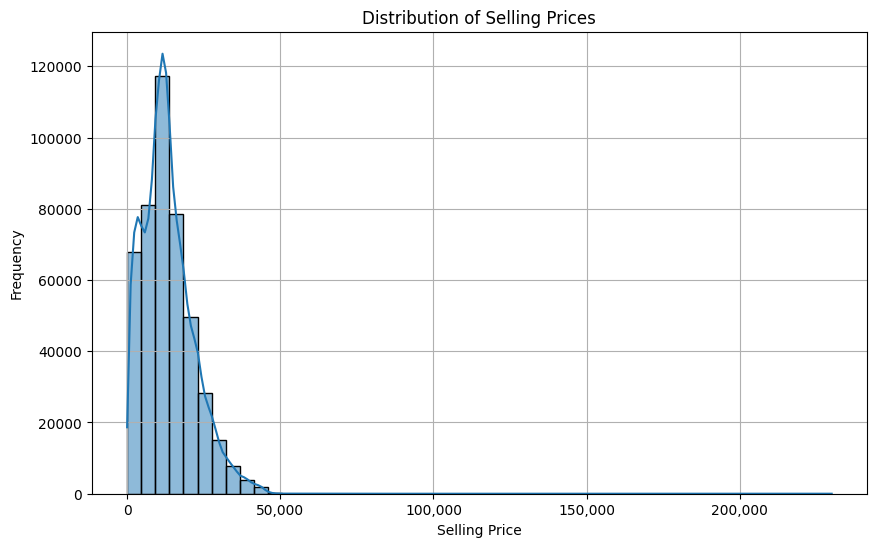

In [13]:
sellingprice_column = 'sellingprice'

plt.figure(figsize=(10, 6))
sns.histplot(df[sellingprice_column].dropna(), bins=50, kde=True)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

In [14]:
price = 'sellingprice'

low_threshold = df[price].quantile(0.02)
high_threshold = df[price].quantile(0.98)

print(f"price lowwer {low_threshold:,.0f}")
print(f"price higher {high_threshold:,.0f}")

price lowwer 1,000
price higher 34,600


In [15]:
df = df[(df['sellingprice'] > 1000) & (df['sellingprice'] < 45000)]

df.shape

(441665, 17)

### sale date 不會先於生產年份 (year column)

In [16]:
df_cleaned = df[df['year'] < df['sale_year']]

df = df_cleaned

df.shape

(432003, 17)

### 新增賣出時車輛年紀

In [17]:
# 相減後加1（包括起始年和結束年） 
df['car_age'] = df['sale_year'] - df['year']

## 找前10成交數量品牌

In [18]:
print("\nUnique Brand:", df['brand'].nunique())


Unique Brand: 47


In [19]:
# Find the top 10 best-selling brands
top_brands = df['brand'].value_counts().nlargest(10).index

df = df[df['brand'].isin(top_brands)]

### 確認有成功

In [20]:
print("\nUnique Brands:", df['brand'].nunique())
print("\nUnique models:", df['model'].nunique())


Unique Brands: 10

Unique models: 274


## market category mapping preparation

### 把目前所有brand and model 列出來 group by brnad

In [21]:
unique_models_list = df.groupby("brand")["model"].unique().reset_index()

unique_models_list.columns = ["brand", "unique_models"]

unique_models_dict = unique_models_list.set_index("brand")["unique_models"].to_dict()

unique_models_dict

{'BMW': array(['5 Series', '3 Series', '6 Series', '7 Series', '1 Series', 'M3',
        'X3', 'X5', 'Z4', 'X6', '5 Series Gran Turismo', 'M5', 'Z3', 'M',
        'X1', 'ActiveHybrid X6', 'X6 M', 'M6', '2 Series',
        '3 Series Gran Turismo', '4 Series', 'ActiveHybrid 7', 'Z4 M',
        'X5 M', 'ActiveHybrid 5', '8 Series', '6 Series Gran Coupe'],
       dtype=object),
 'Chevrolet': array(['Cruze', 'Camaro', 'Silverado 1500', 'Traverse', 'Malibu',
        'Silverado 2500HD', 'Equinox', 'Captiva Sport', 'Impala', 'Volt',
        'Express Cargo', 'Colorado', 'Express', 'Sonic', 'Suburban', 'HHR',
        'Tahoe', 'Aveo', 'Corvette', 'malibu', 'Avalanche', 'Tahoe Hybrid',
        'Malibu Classic', 'Cobalt', 'Uplander', 'Silverado 1500 Classic',
        'Monte Carlo', 'TrailBlazer', 'Malibu Maxx', 'S-10',
        'Silverado 1500HD', 'Spark', 'SSR', 'Impala Limited',
        'Silverado 3500HD', 'Silverado 1500 Hybrid',
        'Silverado 2500HD Classic', 'Silverado 3500', 'TrailBlazer 

### Add in new column market_category

### making a market category map defining which models are what market category

In [22]:
market_category_map = {
    "Economy Sedan": [
        "Altima", "Focus", "Impala", "Sonata", "Cruze", "Taurus",
        "Optima", "200", "Avenger", "Passat", "Civic", "Corolla",
        "Fusion", "Malibu", "Sentra", "Elantra", "Jetta", "Accord",
        "Camry", "Versa", "Rio", "Yaris"    ],
    "Luxury Sedan": [
        "3 Series", "5 Series", "7 Series", "A4", "A6", "A8", "C-Class", 
        "E-Class", "S-Class", "S60", "S90", "TLX", "Q50", "Genesis",
        "Maxima", "300", "G Sedan", "LS", "ES", "IS"    ],
    "Sports Sedan": [
        "M3", "M5", "Charger", "S4", "CTS-V", "IS F", "XFR", "WRX"    ],
    "Economy SUV": [
        "Explorer", "Edge", "Journey", "Escape", "Rogue", "Tucson",
        "Equinox", "Sorento", "CX-5", "CR-V", "RAV4", "Highlander",
        "Santa Fe", "Kicks", "HR-V", "Sportage"    ],
    "Luxury SUV": [
        "Grand Cherokee", "X5", "X3", "Q7", "Q5", "GLC", "GLA", 
        "RX", "LX", "Cayenne", "MDX", "Escalade", "Navigator",
        "GLE", "Macan", "XC90" ],
    "Off-Road SUV": [
        "Wrangler", "4Runner", "Bronco", "Defender", "G-Class"    ],
    "Pickup Truck": [
        "1500", "F-150", "Silverado 1500", "Ram Pickup 1500", 
        "Tacoma", "Tundra", "Ranger", "Colorado", "Frontier"    ],
    "Electric Vehicle": [
        "Leaf", "Model S", "Model 3", "Model X", "Model Y",
        "Bolt", "i3", "i4", "Polestar 2", "Mach-E"    ],
    "Sports Car": [
        "Mustang", "Camaro", "Corvette", "370Z", "911", "M4",
        "Supra", "GT-R", "F-Type", "718 Cayman"    ],
    "Minivan": [
        "Sienna", "Odyssey", "Grand Caravan", "Town and Country",
        "Quest", "Pacifica", "Sedona"    ],
    "Hybrid Car": [
        "Prius", "Camry Hybrid", "Accord Hybrid", "Fusion Hybrid",
        "Highlander Hybrid", "RAV4 Hybrid"    ]
}

def get_market_category(brand, model):
    model = str(model)  
    for category, models in market_category_map.items():
        if any(model.startswith(m) for m in models):
            return category
    return "Other"  

df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


C:\Users\jenna\AppData\Local\Temp\ipykernel_26444\1833262679.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


In [23]:
print("\nUnique Category:", df['market_category'].nunique())

# count other 的數量
other_count = df["market_category"].value_counts().get("Other", 0)

print(f'count other: {other_count}')


Unique Category: 12
count other: 61408


### 減少other 數量
### find out what brand and model the top 20 other belong to

In [24]:
other_models_count = (
    df[df["market_category"] == "Other"]
    .groupby(["brand", "model"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(20)
)

other_models_count

,brand,model,count
146,Nissan,Murano,2398
50,Chevrolet,Tahoe,2273
137,Kia,Forte,2262
140,Kia,Soul,2223
105,Ford,Fiesta,2092
100,Ford,Expedition,1971
102,Ford,F-250 Super Duty,1881
120,Honda,Pilot,1739
49,Chevrolet,Suburban,1721
56,Chevrolet,Traverse,1693


In [25]:
# 更新market category

market_category_map = {
    "Economy Sedan": [
        "Altima", "Focus", "Impala", "Sonata", "Cruze", "Taurus",
        "Optima", "200", "Avenger", "Passat", "Civic", "Corolla",
        "Fusion", "Malibu", "Sentra", "Elantra", "Jetta", "Accord",
        "Camry", "Versa", "Rio", "Yaris", "Forte", "Fiesta", "Sonic", "Cobalt", "Sebring"],
    
    "Luxury Sedan": [
        "3 Series", "5 Series", "7 Series", "A4", "A6", "A8", "C-Class", 
        "E-Class", "S-Class", "S60", "S90", "TLX", "Q50", "Genesis",
        "Maxima", "300", "G Sedan", "LS", "ES", "IS"],
    
    "Sports Sedan": [
        "M3", "M5", "Charger", "S4", "CTS-V", "IS F", "XFR", "WRX"],
    
    "Economy SUV": [
        "Explorer", "Edge", "Journey", "Escape", "Rogue", "Tucson",
        "Equinox", "Sorento", "CX-5", "CR-V", "RAV4", "Highlander",
        "Santa Fe", "Kicks", "HR-V", "Sportage", "Soul", "Pilot", "Pathfinder", "Traverse", "Durango"],
    
    "Luxury SUV": [
        "Grand Cherokee", "X5", "X3", "Q7", "Q5", "GLC", "GLA", 
        "RX", "LX", "Cayenne", "MDX", "Escalade", "Navigator",
        "GLE", "Macan", "XC90", "Tahoe", "Suburban", "Murano", "Expedition"],
    
    "Off-Road SUV": [
        "Wrangler", "4Runner", "Bronco", "Defender", "G-Class"],
    
    "Pickup Truck": [
        "1500", "F-150", "Silverado 1500", "Ram Pickup 1500", 
        "Tacoma", "Tundra", "Ranger", "Colorado", "Frontier", "F-250 Super Duty", "Silverado 2500HD"],
    
    "Electric Vehicle": [
        "Leaf", "Model S", "Model 3", "Model X", "Model Y",
        "Bolt", "i3", "i4", "Polestar 2", "Mach-E"],
    
    "Sports Car": [
        "Mustang", "Camaro", "Corvette", "370Z", "911", "M4",
        "Supra", "GT-R", "F-Type", "718 Cayman"],
    
    "Minivan": [
        "Sienna", "Odyssey", "Grand Caravan", "Town and Country",
        "Quest", "Pacifica", "Sedona"],
    
    "Hybrid Car": [
        "Prius", "Camry Hybrid", "Accord Hybrid", "Fusion Hybrid",
        "Highlander Hybrid", "RAV4 Hybrid"],
    
    "Economy Hatchback": [
        "Caliber", "PT Cruiser", "Accent"],
}


def get_market_category(brand, model):
    model = str(model) 
    for category, models in market_category_map.items():
        if any(model.startswith(m) for m in models):
            return category
    return "Other"  

df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


C:\Users\jenna\AppData\Local\Temp\ipykernel_26444\3437257409.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["market_category"] = df.apply(lambda x: get_market_category(x["brand"], x["model"]), axis=1)


In [26]:
print("\nUnique Category:", df['market_category'].nunique())

# count other 的數量
other_count = df["market_category"].value_counts().get("Other", 0)

print(f'count other: {other_count}')


Unique Category: 13
count other: 29289


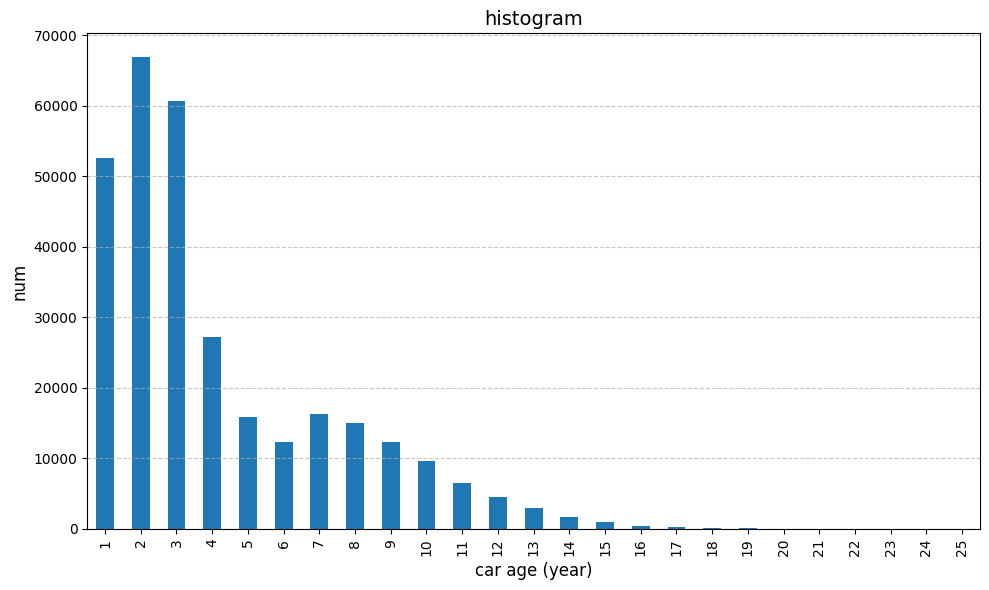

In [27]:
plt.figure(figsize=(10, 6))
df['car_age'].value_counts().sort_index().plot(kind='bar')

plt.title('histogram', fontsize=14)
plt.xlabel('car age (year)', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

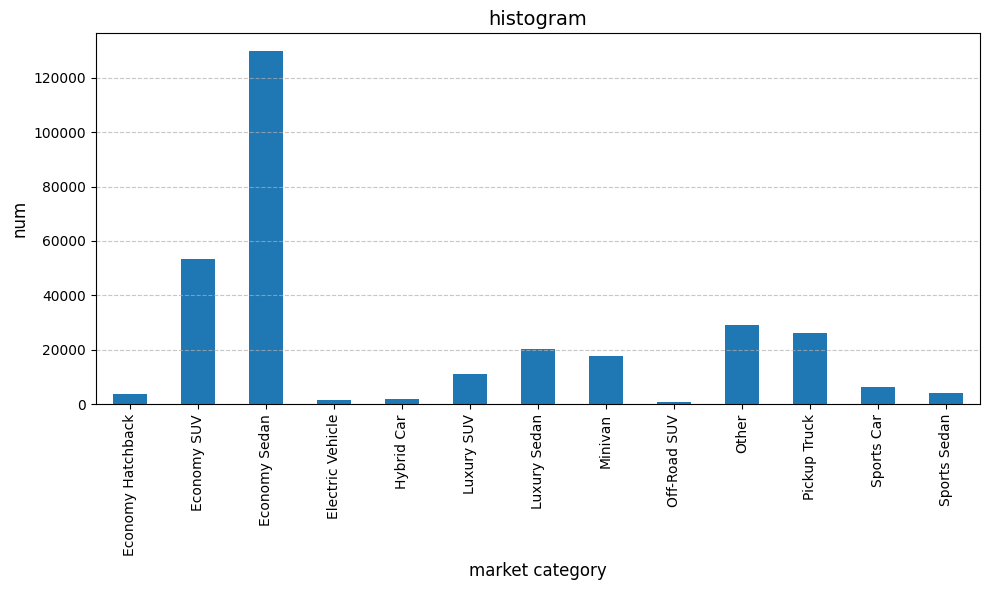

In [28]:
plt.figure(figsize=(10, 6))
df['market_category'].value_counts().sort_index().plot(kind='bar')

plt.title('histogram', fontsize=14)
plt.xlabel('market category', fontsize=12)
plt.ylabel('num', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [29]:
# output_file_path = r"C:\Users\jenna\OneDrive\桌面\unique_models_per_make.csv"
# df.to_csv(output_file_path, index=False)

## 找出對價錢影像最大的feature

In [33]:
!pip install category-encoders

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 9.8/9.8 MB 50.9 MB/s eta 0:00:00


In [35]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

# 定義特徵類別
num_features = ['condition', 'mileage', 'car_age']
low_card_cat_features = ['transmission', 'color', 'interior']
high_card_cat_features = ['brand', 'trim', 'state', 'market_category']
target = 'sellingprice'

# 分割數據集
train, test = train_test_split(df, test_size=0.2, random_state=42)

# One-Hot Encoding for low-cardinality categorical features
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
train_ohe = ohe.fit_transform(train[low_card_cat_features])
test_ohe = ohe.transform(test[low_card_cat_features])

# Target Encoding for high-cardinality categorical features
te = TargetEncoder()
train_te = te.fit_transform(train[high_card_cat_features], train[target])
test_te = te.transform(test[high_card_cat_features])

# 合併處理後特徵
X_train = np.hstack((train[num_features].values, train_ohe, train_te))
X_test = np.hstack((test[num_features].values, test_ohe, test_te))

y_train = train[target].values
y_test = test[target].values

# 確保特徵處理後維度合理
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (245462, 43)
Test Shape: (61366, 43)


## random forest

### why 用random not lienar 因為 
1. mileage, condition, car_age不是線性關係
2. linear 不能處理category data type
3. 線性回歸係數表示的是影響方向   不代表重要性

In [37]:
from sklearn.ensemble import RandomForestRegressor

# 訓練 Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 獲取特徵重要性
feature_importance = rf.feature_importances_

# 合併特徵name
feature_names = num_features + list(ohe.get_feature_names_out(low_card_cat_features)) + high_card_cat_features

# 轉換為 df
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

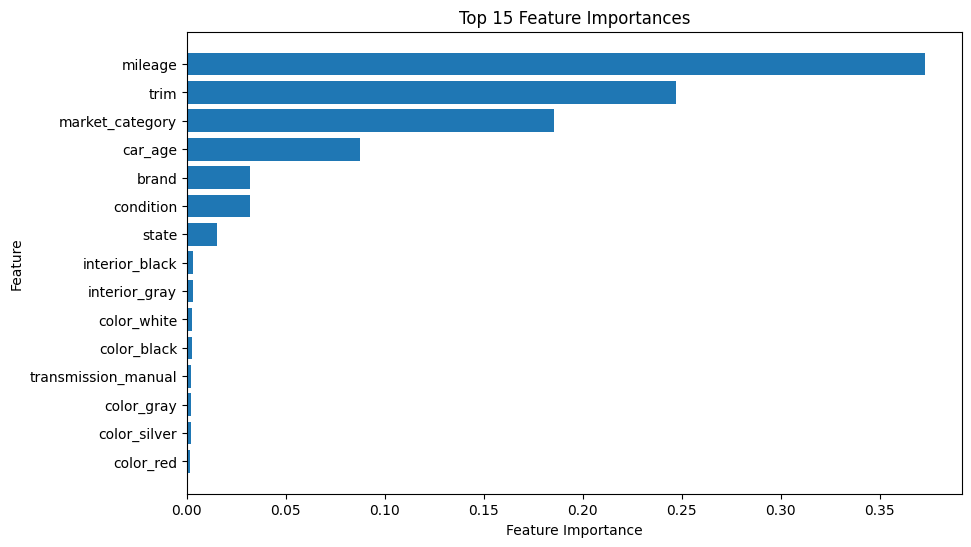

In [38]:
#feature importance 代表該特徵在分裂決策樹時，被用來 降低預測誤差的貢獻程度

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#  探索因果關係 feature 跟 價千關係

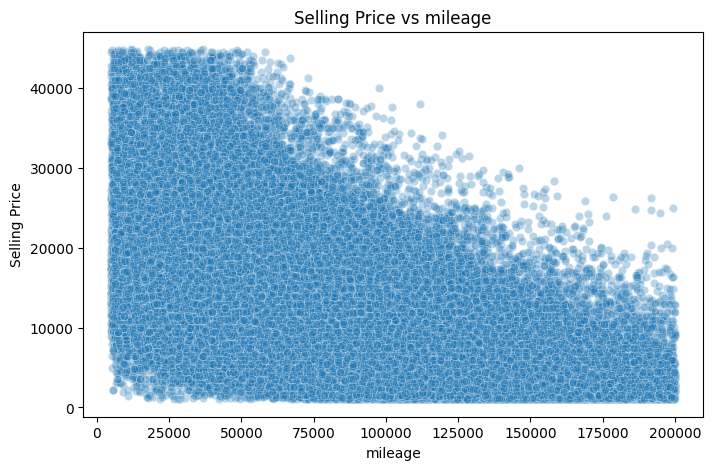

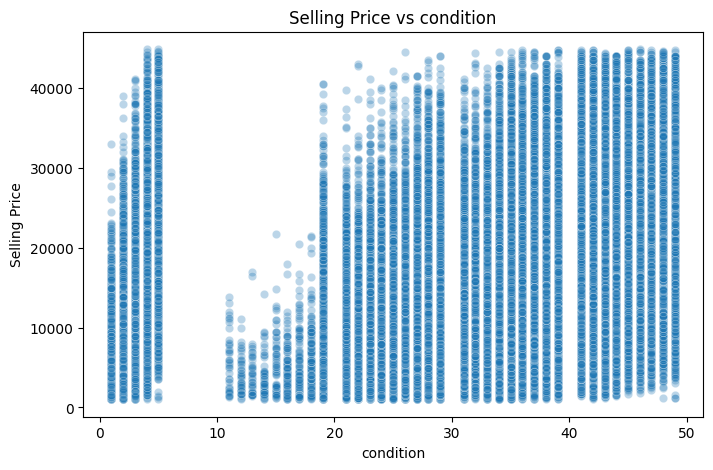

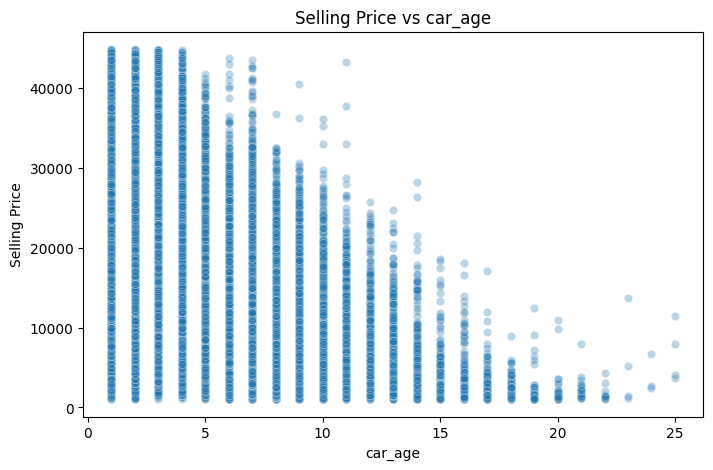

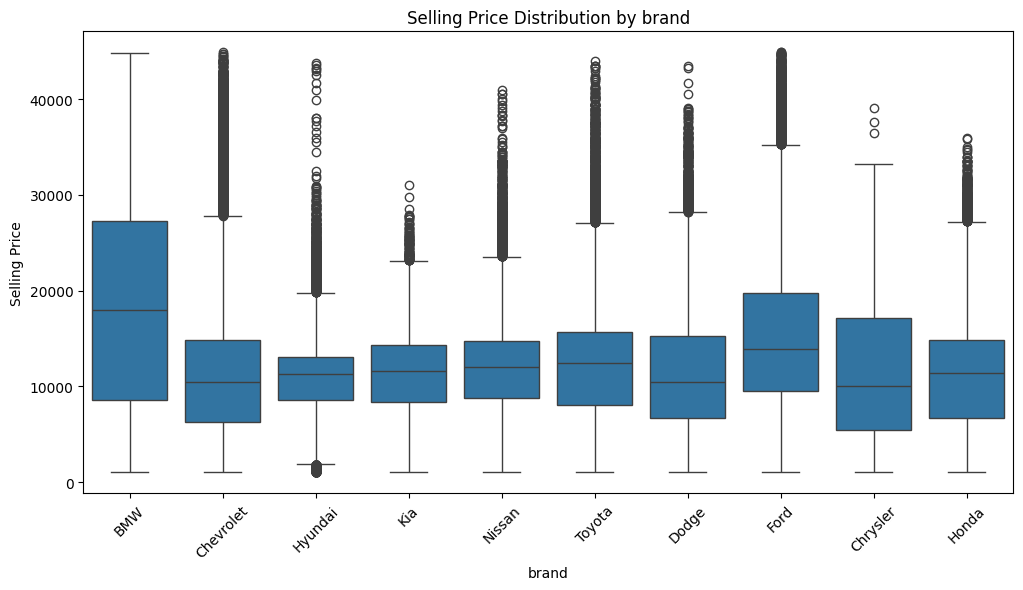

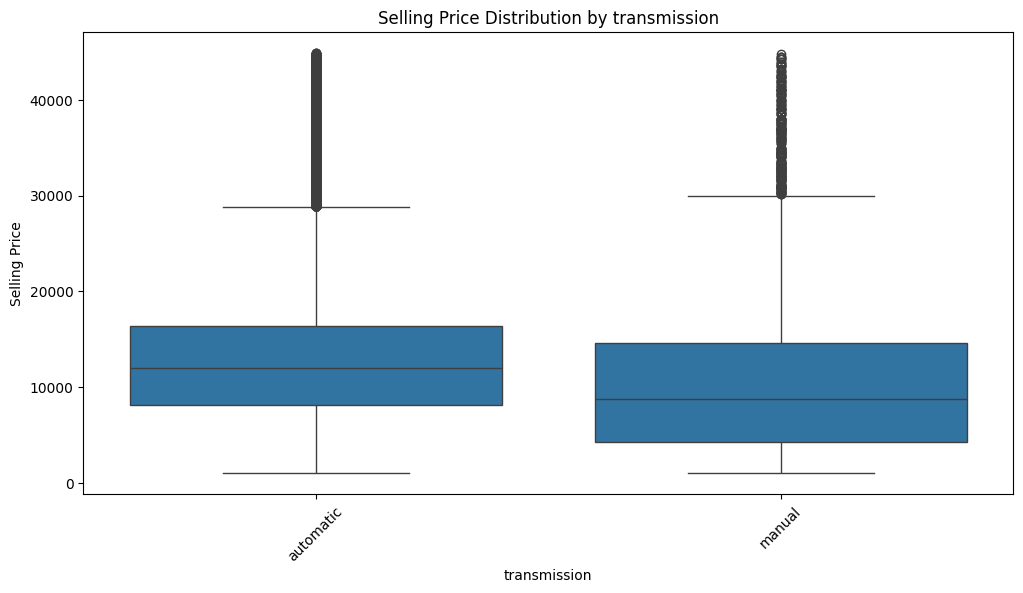

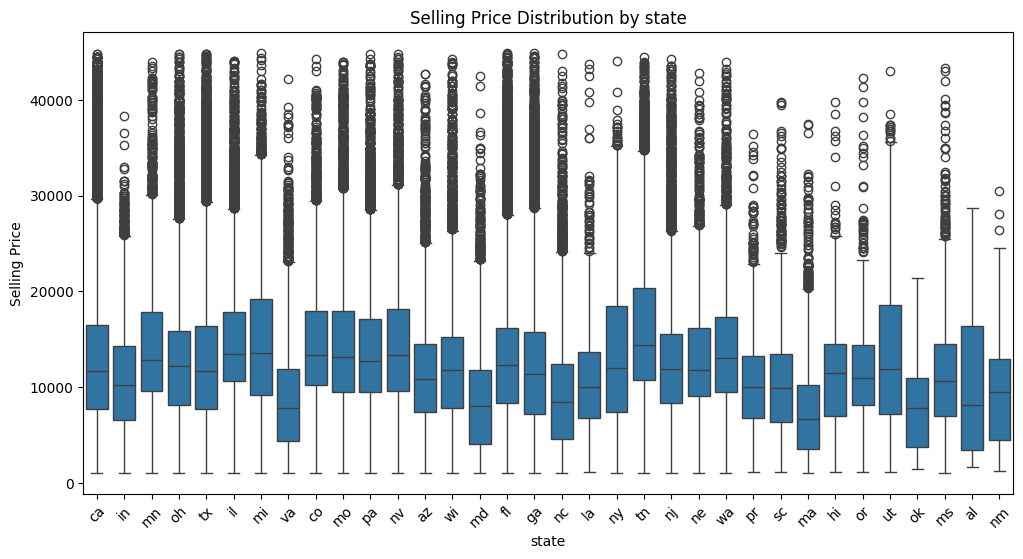

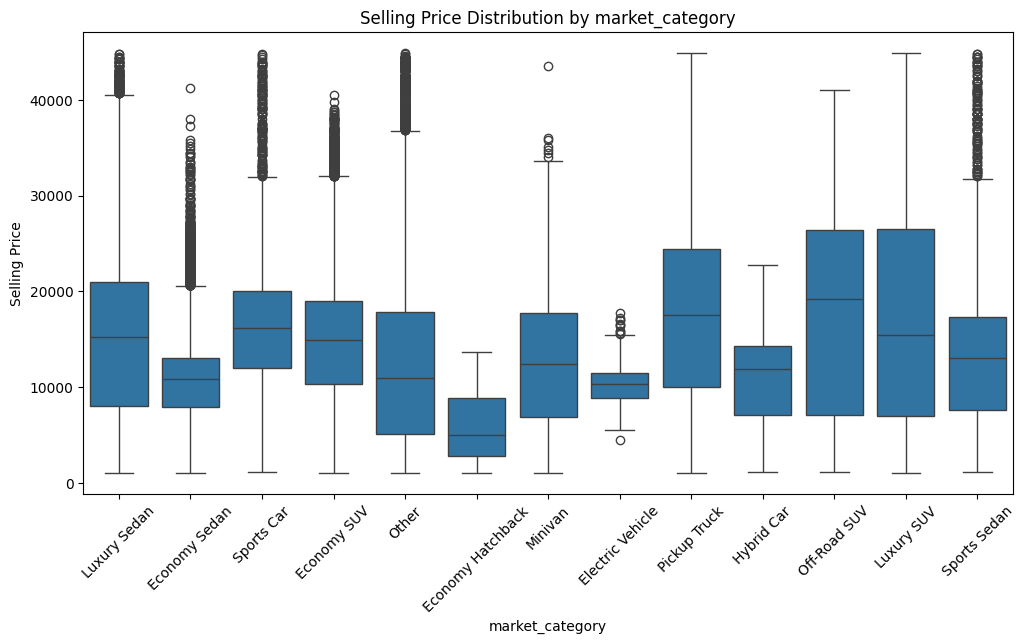

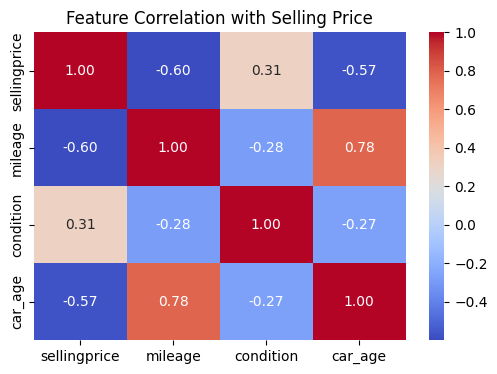

In [44]:
# 散點圖：看number變數與 selling_price 的關係
num_features = ['mileage', 'condition', 'car_age']
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df['sellingprice'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(f"Selling Price vs {feature}")
    plt.show()

# box plt category變數對 sprice 的影響
cat_features = ['brand', 'transmission', 'state', 'market_category']
for feature in cat_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[feature], y=df['sellingprice'])
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Selling Price")
    plt.title(f"Selling Price Distribution by {feature}")
    plt.show()

# 計算correlation coefficient
corr_matrix = df[['sellingprice', 'mileage', 'condition', 'car_age']].corr()

# correlation coefficient Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Selling Price")
plt.show()

# 價格趨勢與車型推薦 

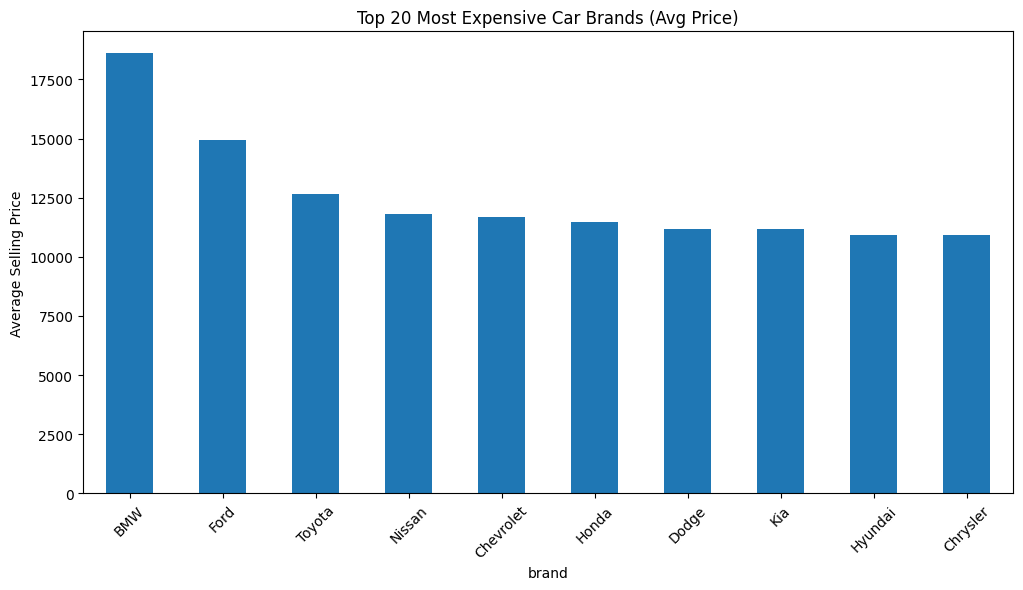

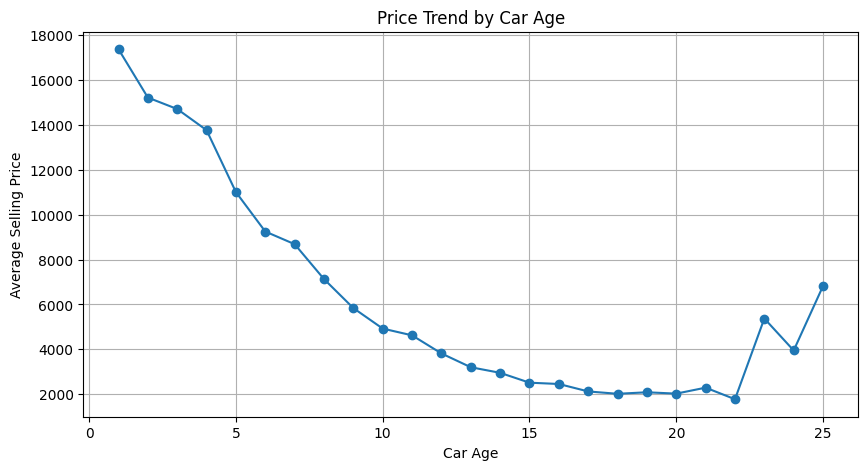

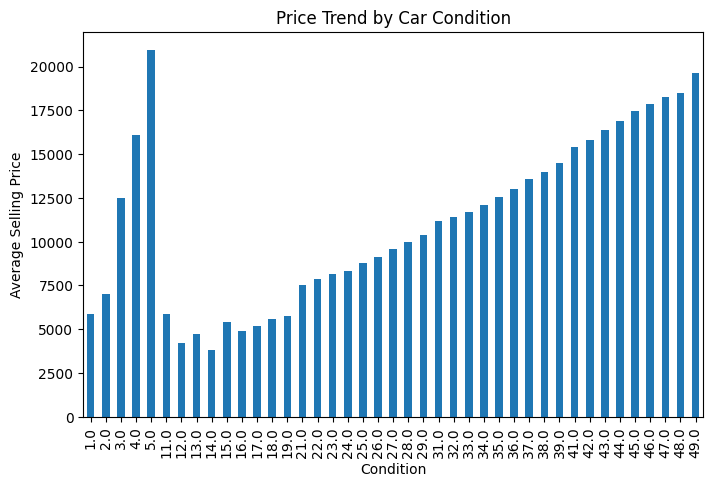

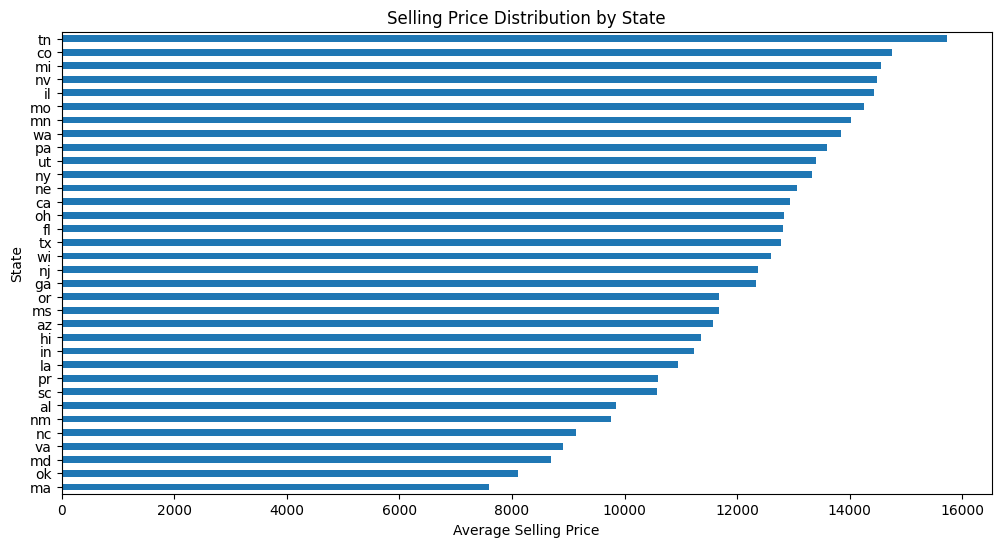

In [41]:
# 品牌均價分析
brand_avg_price = df.groupby('brand')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
brand_avg_price[:20].plot(kind='bar')
plt.ylabel("Average Selling Price")
plt.title("Top 20 Most Expensive Car Brands (Avg Price)")
plt.xticks(rotation=45)
plt.show()

# 不同車齡的均價變化
car_age_price = df.groupby('car_age')['sellingprice'].mean()

plt.figure(figsize=(10, 5))
car_age_price.plot(marker='o')
plt.xlabel("Car Age")
plt.ylabel("Average Selling Price")
plt.title("Price Trend by Car Age")
plt.grid()
plt.show()

# 不同condition的均價
condition_price = df.groupby('condition')['sellingprice'].mean()

plt.figure(figsize=(8, 5))
condition_price.plot(kind='bar')
plt.xlabel("Condition")
plt.ylabel("Average Selling Price")
plt.title("Price Trend by Car Condition")
plt.show()

# state price difference
state_avg_price = df.groupby('state')['sellingprice'].mean().sort_values()

plt.figure(figsize=(12, 6))
state_avg_price.plot(kind='barh')
plt.xlabel("Average Selling Price")
plt.ylabel("State")
plt.title("Selling Price Distribution by State")
plt.show()
